<h3>Lab 8</h3>

# Feel the Heat! Part 2

<div>
    <img src="summer_fan.gif" width=300><br>
</div>

<small>Source: [Canadian Red Cross](https://www.redcross.ca/blog/2010/5/are-you-feeling-the-heat)</small>

The spring is getting hotter, and so are our array skills!

In this lab, we will continue our examination of the raw data from the Bureau of Meteorology on maximum temperatures for Western Australian towns. This is another longer more challenging lab, and you should attempt all the questions you can.


## Data Acquisition

Once again we will source our data from the Australian Government's **Bureau of Meteorology (BOM)** *Climate Data Online* service.


In [2]:
MONTHLY_TEMPERATURE = "IDCJAC0002"
PER_LINE = 12

STATIONS = {"Albany": "009500",
            "Perth": "009021",
            "Broome": "003003",
            "Geraldton": "008050"
           }

* Copy in the following functions, along with your data directories, from the lab _Heat1_
  * `temperature_file(town)` from Q1
  * `year_range(town)` from Q2
  * `get_temperatures (stations, quiet=True)` from Q3


In [3]:
from pathlib import Path
import numpy as np

In [4]:
def temperature_file (town):
    dir_name = "{}_{}".format(MONTHLY_TEMPERATURE, STATIONS[town])
    
    file_name = "{}_{}_{}".format(MONTHLY_TEMPERATURE, STATIONS[town],"Data12.csv")
    
    p = Path(dir_name)/file_name
    
    return p

In [5]:

def year_range(town):
    path = temperature_file (town)
    text = np.genfromtxt(path,delimiter=",",skip_header = 1, filling_values=np.nan, usecols = (np.arange(2,16)))
    return text[0,0],text[-1,0]

In [6]:
def get_temperatures (stations, quiet=True):
    towns = sorted(list(stations.keys()))
    max_length = max([len(x) for x in towns])
    tables = []
    for station in towns:
        path = temperature_file (station)
        data = np.genfromtxt(path,delimiter=",",skip_header = 1, filling_values=np.nan, usecols = (np.arange(2,16)))
        tables.append(data)
        if quiet == False:
            print('Collecting data for {town:<{width}} : {y_range:4.0f} years recorded between {first:.0f} and {last:.0f}'.format
                  (town= station, first=data[0,0],last = data[-1,0], y_range = data[-1,0] - data[0,0],width = max_length))
    return towns,tables

## Data Cleaning and Conversion

Define a convenience function `get_town(town)` that returns the "table" (numerical data) for `town`.

For example:

```
get_table("Albany")[0]

[1880.    22.1   22.8   20.6   19.2   17.5   14.7   15.1   15.2   16.2
   16.2   18.    20.8   18.2]
```



In [7]:
def get_table(town):
    towns = sorted(list(STATIONS.keys()))
    town_index = towns.index(town)
    table = get_temperatures (STATIONS)[1][town_index]
    return table

In [8]:
get_table("Albany")[0]


array([1880. ,   22.1,   22.8,   20.6,   19.2,   17.5,   14.7,   15.1,
         15.2,   16.2,   16.2,   18. ,   20.8,   18.2])

In [9]:
a = get_table("Albany")[:,0] == 1938.

get_table("Albany")[a]

array([[1938. ,   22.4,   21.9,   22.2,   19.9,   18.5,   16.1,   16. ,
          16.9,   18. ,   19.7,   21.4,    nan,    nan]])

### Verifying the data

Let's start with the first year of data.

* Using `np.mean()` and array selection, determine whether the mean of the first 12 months maximum temperatures is equal to the average annual maximum reported for Albany in the last column of the table (1 line of code).

* Repeat the above using `np.isclose()` rather than equality.

In [10]:
first_year = get_table("Albany")[0]
np.mean(first_year[1:-1]) == first_year[-1]

True

In [11]:
np.isclose(np.mean(first_year[1:-1]), first_year[-1])

True

Let's try doing this on all the years (the whole 2-D array) in "one go".

Complete the following without using any loops. (Each should take 1 line to do the operation, and one line to check the shape where relevant.)

- Select all of the monthly temperature data into an array \(that is, all columns except the year and the average\). Check the shape is as you would expect.

- Use `ndarray.mean()` or `numpy.mean()` with the `axis` argument to get an array of the means for all years, rounded to 1 decimal place. Check the shape \(to ensure you used the right axis\).

- Create a boolean array called `mismatch` of all those years where the stated annual average is not equal to your calculated average. Check the shape.

- If you used `!=` above, try with `np.not_equal()` and with `np.isclose()`.

- Use numpy's `any()` to check whether   

- here are any that are different.



In [12]:
albany = get_table("Albany")
monthly_temps = albany[:,1:-1]
monthly_temps
monthly_temps.shape

(107, 12)

In [13]:
all_monthly_mean = np.round(np.mean(monthly_temps, axis = 1),1)
all_monthly_mean


array([18.2, 18.2, 17.8, 17.8, 17.9, 17.8, 17.6, 17.3, 18.4, 17.1, 17. ,
       18.3, 18.8, 18.9, 19.8, 19.6, 20.1, 19.6, 20.1, 19.7, 19. , 19.8,
       19.4, 18.8, 19.7, 19. , 19.7, 20.1, 19.7, 20. , 20.2, 20. , 19.9,
       19.5, 19.8, 20. , 20. , 19.5, 20.8, 20.3, 20.7, 21. , 19.9, 20. ,
       20. , 19.5, 19.2, 19.4, 19.3, 18.8, 20.4, 19.3, 19.8, 20.3, 20.3,
       19.4, 19.8, 20. ,  nan, 19.9, 20.4, 20. , 19.6, 19.1, 19.6, 19.7,
       19.5, 19.4, 20. , 20.1, 20. , 19.3, 19.3, 19.4, 19.7, 19. , 19.3,
       20.2, 19.8, 20.1, 18.8, 20.3, 20.1, 20.1, 19.1,  nan,  nan, 19.8,
       19.6, 19.4, 19.6, 19.7, 19.4, 19.6, 19.8, 20.4, 20.8, 20.3, 20.3,
       20.3, 19.3, 19.7, 19.7, 19.9, 20.1, 19.7,  nan])

In [14]:
albany[:,-1]

array([18.2, 18.2, 17.8, 17.8, 17.9, 17.8, 17.6, 17.3, 18.4, 17.1, 17. ,
       18.3, 18.8, 18.9, 19.8, 19.6, 20.1, 19.6, 20.1, 19.7, 19. , 19.8,
       19.4, 18.8, 19.7, 18.9, 19.7, 20.1, 19.7, 20. , 20.2, 20. , 19.9,
       19.5, 19.8, 20. , 20. , 19.5, 20.8, 20.3, 20.6, 21. , 19.9, 20. ,
       20. , 19.5, 19.2, 19.4, 19.3, 18.9, 20.4, 19.3, 19.8, 20.3, 20.3,
       19.4, 19.8, 20. ,  nan, 19.9, 20.4, 20. , 19.6, 19.1, 19.6, 19.7,
       19.5, 19.4, 19.9, 20.1, 20. , 19.3, 19.3, 19.4, 19.7, 19. , 19.3,
       20.2, 19.8, 20.1, 18.8, 20.3, 20.1, 20.1, 19.1,  nan,  nan, 19.8,
       19.6, 19.4, 19.6, 19.7, 19.5, 19.6, 19.8, 20.4, 20.8, 20.3, 20.3,
       20.3, 19.4, 19.7, 19.7, 19.9, 20.1, 19.7,  nan])

In [15]:
all_monthly_mean == albany[:,-1]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True, False])

In [16]:
mismatch = np.not_equal(all_monthly_mean,albany[:,-1])
mismatch

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True,  True, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False,  True, False, False, False, False, False,  True])

In [17]:
mismatch_2 = np.not_equal(all_monthly_mean,albany[:,-1])
mismatch_2

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True,  True, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False,  True, False, False, False, False, False,  True])

In [18]:
mismatch_3 = np.logical_not(np.isclose(all_monthly_mean,albany[:,-1]))
mismatch_3

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True,  True, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False,  True, False, False, False, False, False,  True])

In [19]:
np.any(mismatch_3)

True

#### Masking out the 'bad' data

* Use the boolean array from above as a mask to select all the rows in the Albany data where the averages don't match. (1 line of code)
* Change your line of code from above so that it prints just the year for each of the rows that don't match.

_Hint: You can combine selection using a boolean array with the other kinds of selection._


In [20]:
albany[mismatch]

array([[1905. ,   22.8,   21.6,   20.9,   21.1,   18.2,   16.2,   15.9,
          15. ,   15.7,   17.3,   20.2,   22.5,   18.9],
       [1920. ,   25.3,   24.2,   23.8,   22.8,   19. ,   16.2,   15.8,
          15.8,   18.2,   20.8,   22.5,   23.4,   20.6],
       [1929. ,   21.9,   22.5,   20.5,   20.1,   17.7,   15.5,   15.2,
          15.2,   17.7,   18.1,   20.1,   21.7,   18.9],
       [1938. ,   22.4,   21.9,   22.2,   19.9,   18.5,   16.1,   16. ,
          16.9,   18. ,   19.7,   21.4,    nan,    nan],
       [1948. ,   23.8,   23.8,   23.7,   20.6,   20.1,   17.3,   15.9,
          17.4,   17.6,   18.5,   19.7,   21. ,   19.9],
       [1965. ,   24.4,   23.6,   23.1,   22.3,    nan,    nan,    nan,
           nan,    nan,    nan,    nan,    nan,    nan],
       [2002. ,    nan,    nan,    nan,    nan,    nan,    nan,    nan,
           nan,   17.5,   19. ,   20.2,   21.3,    nan],
       [2008. ,   21.8,   22.8,   21.9,   21.3,   19.9,   17.9,   15.6,
          16.6,   17.9,  

In [21]:
albany[mismatch][:,0] #select the section then select the first column

array([1905., 1920., 1929., 1938., 1948., 1965., 2002., 2008., 2016.,
       2022.])

In [22]:
albany[mismatch,0] #use boolean mask to define the rows first the select 0th column directly 

array([1905., 1920., 1929., 1938., 1948., 1965., 2002., 2008., 2016.,
       2022.])

In [23]:
test =  [True, False, False, False, False, False, False, False, False, False, False, False, False, False]
albany[mismatch,test]# selecting all the rows then use a boolean mask to select columns, essentially indexing. 

array([1905., 1920., 1929., 1938., 1948., 1965., 2002., 2008., 2016.,
       2022.])

In [24]:
year_and_av = [True, False, False, False, False, False, False, False, False, False, False, False, False, True]
print(albany[mismatch][:,year_and_av])

[[1905.    18.9]
 [1920.    20.6]
 [1929.    18.9]
 [1938.     nan]
 [1948.    19.9]
 [1965.     nan]
 [2002.     nan]
 [2008.    19.5]
 [2016.    19.4]
 [2022.     nan]]


In [25]:
albany[[2,3],[4,5]]## has to match numbers in the selected row and columns this way. in oder to return two results(cells)

array([18.8, 17.3])

In [26]:
albany[mismatch][:,[0,-1]]

array([[1905. ,   18.9],
       [1920. ,   20.6],
       [1929. ,   18.9],
       [1938. ,    nan],
       [1948. ,   19.9],
       [1965. ,    nan],
       [2002. ,    nan],
       [2008. ,   19.5],
       [2016. ,   19.4],
       [2022. ,    nan]])

In [27]:
albany[2,1:4]
albany[2][1:4]

array([20.2, 22.1, 20.1])

In [28]:
albany[1:4,[2,8]]


array([[22.2, 15.5],
       [22.1, 14.9],
       [20.5, 14.1]])

In [29]:
albany[1:4,2:8]

array([[22.2, 22.2, 19.6, 17.1, 14.4, 15.3],
       [22.1, 20.1, 18.8, 16.3, 14.6, 14.4],
       [20.5, 19.9, 20.1, 17.3, 15.9, 14.5]])

In [30]:
albany[[1,4],2:8]

array([[22.2, 22.2, 19.6, 17.1, 14.4, 15.3],
       [21.5, 21.2, 18.6, 16.6, 14.2, 13.8]])

In [31]:
albany[[1,4],[2,8]]

array([22.2, 16.1])

In [32]:
albany[1:4]

array([[1881. ,   20.1,   22.2,   22.2,   19.6,   17.1,   14.4,   15.3,
          15.5,   16.4,   16.1,   18.7,   20.7,   18.2],
       [1882. ,   20.2,   22.1,   20.1,   18.8,   16.3,   14.6,   14.4,
          14.9,   16.4,   17.3,   17.8,   20.8,   17.8],
       [1883. ,   20.7,   20.5,   19.9,   20.1,   17.3,   15.9,   14.5,
          14.1,   14.4,   16.5,   18.2,   21.9,   17.8]])

Let's say we want to extract both the year and annual average columns from the temperature table. We could do that using boolean masks with something like this:

```
year_and_av = [True, False, False, False, False, False, False, False, False, False, False, False, False, True]
print(albany[mismatch][:,year_and_av])
```

* Make sure you understand this construction, and then try it out. Print the shape of the resulting array.

Note that `year_and_av` was automagically cast from a list to an array in this demonstration. Better would be to define `year_and_av` as an array.

* Repeat this with `year_and_av` defined as an array.



In [33]:
year_and_av_array = np.array(year_and_av)
print(albany[mismatch][:,year_and_av_array])

[[1905.    18.9]
 [1920.    20.6]
 [1929.    18.9]
 [1938.     nan]
 [1948.    19.9]
 [1965.     nan]
 [2002.     nan]
 [2008.    19.5]
 [2016.    19.4]
 [2022.     nan]]


In [34]:
albany[0:4,1:-1].max()

22.8

### Selecting with "Index" Arrays

Using a boolean array to select the columns in the above example is a bit unweildy. Luckily `numpy` allows integer "masks" (or arrays of indices) as well.

As a 1-D example, try the following which prints the temperatures for each quarter in the first year for Albany:

```
first_year = albany[0,:]         # select a 1-D array of the first year
quarters = np.array([3,6,9,12])  # specify an array of indices for March, June, September, December
print(first_year[quarters])
```



As a 2-D example, if we want the columns for January and April, we could use `albany[:,[1,4]]`. 

* Give this a try. Use selection again on the output to print only the first 5 rows.

You can also mix the use of boolean masks (such as `mismatch` from above) with the use of integer (or index) arrays.

* Print the year and annual average columns for the mismatched years using an integer array to select the columns.
  * See if you can do this at least two different ways.

You should get the same output you got with the boolean mask.

In [35]:
first_5 = albany[[1,2,3,4,5],:]
first_5

array([[1881. ,   20.1,   22.2,   22.2,   19.6,   17.1,   14.4,   15.3,
          15.5,   16.4,   16.1,   18.7,   20.7,   18.2],
       [1882. ,   20.2,   22.1,   20.1,   18.8,   16.3,   14.6,   14.4,
          14.9,   16.4,   17.3,   17.8,   20.8,   17.8],
       [1883. ,   20.7,   20.5,   19.9,   20.1,   17.3,   15.9,   14.5,
          14.1,   14.4,   16.5,   18.2,   21.9,   17.8],
       [1884. ,   20.9,   21.5,   21.2,   18.6,   16.6,   14.2,   13.8,
          16.1,   16. ,   17.3,   19.5,   18.7,   17.9],
       [1885. ,   21.5,   20.4,   20.3,   19.1,   15.7,   14.6,   14.8,
          14.3,   15.1,   17. ,   18.8,   21.6,   17.8]])

In [36]:
albany[mismatch][:,[0,-1]]

array([[1905. ,   18.9],
       [1920. ,   20.6],
       [1929. ,   18.9],
       [1938. ,    nan],
       [1948. ,   19.9],
       [1965. ,    nan],
       [2002. ,    nan],
       [2008. ,   19.5],
       [2016. ,   19.4],
       [2022. ,    nan]])

In [37]:
albany[:,[0,-1]][mismatch]

array([[1905. ,   18.9],
       [1920. ,   20.6],
       [1929. ,   18.9],
       [1938. ,    nan],
       [1948. ,   19.9],
       [1965. ,    nan],
       [2002. ,    nan],
       [2008. ,   19.5],
       [2016. ,   19.4],
       [2022. ,    nan]])

#### Q1. Selecting the hottest years [1 lab mark]

Write a function `hot_years(town)` that contains _no loops_, and has as its output a pair `(overall_average, hottest_years)` where:

* `overall_average` is the average of all the averages (that is, the last column) ignoring nans.
* `hottest_years` is an array containing the year and average, for each year where the average is hotter than the overall average.

How many years are hotter than the overall average? Is it about what you would expect?

In [42]:
def hot_years (town):
    town_table = get_table(town)
    overall_average = np.nanmean(town_table[:,-1])
    hotter_mask = town_table[:,-1] > overall_average
    hottest_years = town_table[hotter_mask][:,[0,-1]]
    return (overall_average, hottest_years)
    # YOUR CODE HERE

In [43]:
from nose.tools import assert_equal, assert_true
(average, years) = hot_years("Albany")
assert_true(np.isclose(average%0.2,0.12912621359223414))
assert_equal(years.shape, (63,2))
assert_true(np.isclose(years[-1,0]-years[0,0],127))
assert_true(np.isclose(years[-1,1]-years[0,1],-0.1))

(average, years) = hot_years("Geraldton") # will be tested next!
print("So far, so good. Continue with your own testing.")


So far, so good. Continue with your own testing.


### Stacks of arrays

Another way of extracting columns is to `stack` them in a new array. Look up the API for `numpy.stack()`.

Returning to our years where the calculated average doesn't match the listed average, assuming `mismatch` is my boolean mask, I can combine this with index selection and `stack` to say:

```
print(np.stack((albany[mismatch,0], albany[mismatch,13])))

[[1905.  1920.  1929.  1938.  1948.  1965.  2002.  2008.  2016.  2020. ]
 [  18.9   20.6   18.9    nan   19.9    nan    nan   19.5   19.4    nan]]
```

- Give this a try.

This has taken each column of data as a 1-d (flattened) array and stacked them to create a 2-d array.

Given our data are extracted from the columns of a "table", its more natural to keep them as vertical arrays. If we want to see them vertically again, we can _transpose_ the stacked array. Give this a try:

```
print(np.transpose(np.stack((albany[mismatch,0], albany[mismatch,13]))))
```

The `T` operator can also be used as shorthand:

```
print(np.stack((albany[mismatch,0], albany[mismatch,13])).T)
```

While this is perhaps less efficient than the earlier approach, since it creates a new array, its also more versatile. We can include other data in the new array, such as our calculated means.

* Using this approach (stacking the three together), create an array that has the year, reported average, and calculated mean, for each year where the reported and calculated averages don't match. You should end up with a 10x3 array.

Your output should start like this:

```
[[1905.    18.9   19. ]
 [1920.    20.6   20.7]
 [1929.    18.9   18.8]
 [1938.     nan    nan]
...
```

Could all of your differences be explained by rounding or precision errors and missing data?



In [115]:
print(np.stack((albany[mismatch,0], albany[mismatch,13])))

[[1905.  1920.  1929.  1938.  1948.  1965.  2002.  2008.  2016.  2022. ]
 [  18.9   20.6   18.9    nan   19.9    nan    nan   19.5   19.4    nan]]


In [116]:
print(np.transpose(np.stack((albany[mismatch,0], albany[mismatch,13]))))

[[1905.    18.9]
 [1920.    20.6]
 [1929.    18.9]
 [1938.     nan]
 [1948.    19.9]
 [1965.     nan]
 [2002.     nan]
 [2008.    19.5]
 [2016.    19.4]
 [2022.     nan]]


In [117]:
print(np.stack((albany[mismatch,0], albany[mismatch,13])).T)

[[1905.    18.9]
 [1920.    20.6]
 [1929.    18.9]
 [1938.     nan]
 [1948.    19.9]
 [1965.     nan]
 [2002.     nan]
 [2008.    19.5]
 [2016.    19.4]
 [2022.     nan]]


In [118]:
albany[mismatch,0]

array([1905., 1920., 1929., 1938., 1948., 1965., 2002., 2008., 2016.,
       2022.])

In [119]:
albany[mismatch,-1]

array([18.9, 20.6, 18.9,  nan, 19.9,  nan,  nan, 19.5, 19.4,  nan])

In [120]:
all_monthly_mean[mismatch]

array([19. , 20.7, 18.8,  nan, 20. ,  nan,  nan, 19.4, 19.3,  nan])

In [121]:
print(np.stack((albany[mismatch,0], albany[mismatch,13],all_monthly_mean[mismatch])).T)

[[1905.    18.9   19. ]
 [1920.    20.6   20.7]
 [1929.    18.9   18.8]
 [1938.     nan    nan]
 [1948.    19.9   20. ]
 [1965.     nan    nan]
 [2002.     nan    nan]
 [2008.    19.5   19.4]
 [2016.    19.4   19.3]
 [2022.     nan    nan]]


#### `np.hstack`, `np.vstack` and `np.concatenate`

Stacking (and concatenating) can be used to create a bigger array in the same dimensions, or in a new dimension (as we did with `stack` above, where we stacked 1-D arrays to form a 2-D array).

Let's say we have the years in three 1-d arrays and we want to put them in one long array. We can use `hstack` to stack them "horizontally":

```
(albany, broome, perth) = (tables[towns.index("Albany")], tables[towns.index("Broome")], tables[towns.index("Perth")])all_years = np.hstack((albany[:,0], broome[:,0], perth[:,0]))
print(all_years.shape)
print(all_years)

(315,)
[1880. 1881. 1882. 1883. 1884. 1885. 1886. 1887. 1888. 1889. 1890. 1891.
 1892. 1893. 1894. 1895. 1896. 1897. 1898. 1899. 1900. 1901. 1902. 1903.
 1904. 1905. 1906. 1907. 1908. 1909. 1910. 1911. 1912. 1913. 1914. 1915.
...
```

* Try this using `concatenate`.
* Try using `vstack`. Does it work? What is the difference?

In [122]:
towns,tables = get_temperatures (STATIONS, quiet=True)

In [123]:
(albany, broome, perth) = (tables[towns.index("Albany")], tables[towns.index("Broome")], tables[towns.index("Perth")])
all_years = np.hstack((albany[:,0], broome[:,0], perth[:,0]))
print(all_years.shape)
print(all_years)

(270,)
[1880. 1881. 1882. 1883. 1884. 1885. 1886. 1887. 1888. 1889. 1890. 1891.
 1892. 1893. 1894. 1895. 1896. 1897. 1898. 1899. 1900. 1901. 1902. 1903.
 1904. 1905. 1906. 1907. 1908. 1909. 1910. 1911. 1912. 1913. 1914. 1915.
 1916. 1917. 1918. 1919. 1920. 1921. 1922. 1923. 1924. 1925. 1926. 1927.
 1928. 1929. 1930. 1931. 1932. 1933. 1934. 1935. 1936. 1937. 1938. 1939.
 1940. 1941. 1942. 1943. 1944. 1945. 1946. 1947. 1948. 1949. 1950. 1951.
 1952. 1953. 1954. 1955. 1956. 1957. 1958. 1959. 1960. 1961. 1962. 1963.
 1964. 1965. 2002. 2003. 2004. 2005. 2006. 2007. 2008. 2009. 2010. 2011.
 2012. 2013. 2014. 2015. 2016. 2017. 2018. 2019. 2020. 2021. 2022. 1939.
 1940. 1941. 1942. 1943. 1944. 1945. 1946. 1947. 1948. 1949. 1950. 1951.
 1952. 1953. 1954. 1955. 1956. 1957. 1958. 1959. 1960. 1961. 1962. 1963.
 1964. 1965. 1966. 1967. 1968. 1969. 1970. 1971. 1972. 1973. 1974. 1975.
 1976. 1977. 1978. 1979. 1980. 1981. 1982. 1983. 1984. 1985. 1986. 1987.
 1988. 1989. 1990. 1991. 1992. 1993. 1994. 1

In [124]:
all_years_2 = np.concatenate((albany[:,0], broome[:,0], perth[:,0]))
all_years_2

array([1880., 1881., 1882., 1883., 1884., 1885., 1886., 1887., 1888.,
       1889., 1890., 1891., 1892., 1893., 1894., 1895., 1896., 1897.,
       1898., 1899., 1900., 1901., 1902., 1903., 1904., 1905., 1906.,
       1907., 1908., 1909., 1910., 1911., 1912., 1913., 1914., 1915.,
       1916., 1917., 1918., 1919., 1920., 1921., 1922., 1923., 1924.,
       1925., 1926., 1927., 1928., 1929., 1930., 1931., 1932., 1933.,
       1934., 1935., 1936., 1937., 1938., 1939., 1940., 1941., 1942.,
       1943., 1944., 1945., 1946., 1947., 1948., 1949., 1950., 1951.,
       1952., 1953., 1954., 1955., 1956., 1957., 1958., 1959., 1960.,
       1961., 1962., 1963., 1964., 1965., 2002., 2003., 2004., 2005.,
       2006., 2007., 2008., 2009., 2010., 2011., 2012., 2013., 2014.,
       2015., 2016., 2017., 2018., 2019., 2020., 2021., 2022., 1939.,
       1940., 1941., 1942., 1943., 1944., 1945., 1946., 1947., 1948.,
       1949., 1950., 1951., 1952., 1953., 1954., 1955., 1956., 1957.,
       1958., 1959.,

#### Q2. Putting it all together [1 lab mark]

Write a function `validate_averages()` that:
* reads the temperature data for all towns specified in the `STATIONS` dictionary in alphabetical order of town name (using `get_temperatures()`)
* returns an $n$ x 3 array which has one line for each of the $n$ cases in which the recorded annual average does not reconcile with the calculated average, the three columns being year, reported mean, and calculated mean

Note that:
* the array should be ordered (vertically) by town and then by year (although there is no label for the towns, it is just numbers)
* `nan` is considered as not matching any number (including `nan`)
* calculated means should be rounded to 1 decimal place
* comparison of floats should use `np.islcose()` or related methods
* you should not assume STATIONS will always be the same in future - there could be fewer or more towns (but the format will be the same)

(This should only take about 8 lines of code, without being overly terse.)



In [125]:
def validate_averages():
    towns,tables = get_temperatures (STATIONS, quiet=True)
    final_result = []
    for town in towns:
        station = tables[towns.index(town)]
        all_monthly_mean = np.round(np.mean(station[:,1:-1], axis = 1),1)
        mismatch = ~np.isclose(all_monthly_mean,station[:,-1])
        result = (np.stack((station[mismatch,0], station[mismatch,-1],all_monthly_mean[mismatch])))
        final_result.append(result)
    return(np.hstack(final_result).T)

In [126]:
answer = validate_averages()
assert_equal(answer[0,0], 1905.)
assert_equal(answer[10,0], 1939.)
assert_equal(answer[11,2], 32.6)
assert_equal(np.all(np.equal(np.isnan(answer[3]), np.array([False, True, True]))), True)
print("So far, so good. You should do additional testing.")


So far, so good. You should do additional testing.


* Print the results of running `validate_averages()` for all the stations. What do you observe?
* Use a list comprehension to count the number of rows returned by `'validate_averages()` that do not have a missing reported average. (This will be useful for checking your code later on.)

In [127]:
print(validate_averages())

[[1905.    18.9   19. ]
 [1920.    20.6   20.7]
 [1929.    18.9   18.8]
 [1938.     nan    nan]
 [1948.    19.9   20. ]
 [1965.     nan    nan]
 [2002.     nan    nan]
 [2008.    19.5   19.4]
 [2016.    19.4   19.3]
 [2022.     nan    nan]
 [1939.     nan    nan]
 [1954.    32.5   32.6]
 [1993.    31.7   31.8]
 [2022.     nan    nan]
 [1890.    24.1   24. ]
 [1891.     nan    nan]
 [1904.    24.9   25. ]
 [1938.    24.4   24.5]
 [1942.     nan    nan]
 [1948.    25.3   25.2]
 [1953.     nan    nan]
 [1944.     nan    nan]
 [1979.    24.2   24.3]
 [1992.    23.8   23.7]
 [2022.     nan    nan]]


In [128]:
count = len([x for x in validate_averages() if ~np.isnan(x[-1])])
count

14

### Data precision and cleaning policy

From the results of our `validate_averages()` function, we can see that our mismatches in the averages are two types: missing data, and values that are out by one decimal place (1dp). Of course there may be data for other stations that we have't checked that are out by more than this.

* _For the numbers that differ by one decimal place, which do anticipate is more accurate, and why?_

The averages that we have calculated are based on the monthly numbers, which are already rounded to 1dp (presumably for human consumption). In summing these numbers to get the average, the "errors" or lack of precision from rounding, is accumulated. If the positive and negative errors are roughly equal, they may tend to cancel each other out (as has happened in the majority of cases in our data). Where this does not occur we may see them build up to the point that they affect the precision we are seeing (in this case to 1dp).

In the case of the reported averages, it seems reasonable to assume that more precise monthly figures were used in the calculations, and the rounding to 1dp only occurred at the end of the calculation. These results are therefore likely to be more reliable.

In general, it is good practice to *delay rounding until as late as possible* to avoid compounding rounding errors.

Of course, all of this assumes that the sensors used to read the temperature data are sufficiently accurate. If not, the differences will be within the realm of "_noise_". Nevertheless it seems reasonable to assume that the reported averages are _not worse_ than our calculated averages, for the above reasons.

In respect of the missing data, we can see (at least for these data) that the years with reported null values correspond to those that we were also not able to calculate due to missing monthly data. It seems reasonable to assume that missing values in the reported averages column reflect issues in the recorded data.

Finally, we need to consider floating point precision. We know that the floating point representation of the two means may be slightly smaller or larger than the number reported to 1dp. We might therefore choose to accept a _tolerance_ between calculated and reported means.

Our results for `validate_averages()` suggest that a tolerance of around 0.1 seems reasonable. Note however that we are comparing rounded calculated averages with the reported averages. The raw calculated averages may therefore be up to +/-0.05 different to those we listed. In some ways rounding to 1dp and then using `islcose()` is a little artificial, since `isclose()` introduces a tolerance that (by default) is smaller than variance obtained by rounding. (Remember the philosophy of delaying rounding as long as possible.)

Ultimately, we cannot get around the fact that we must "choose our poison", and set a somewhat arbitrary cut-off. Based on our inspection from `validate_averages()`, which included a potential rounding error up to 0.05, we will set our tolerance at 0.15. (You might like to experiment with different tolerances and see how they affect the results.)

We will therefore proceed with the follow **data cleaning policy**:

1. If the calculated mean is within 0.15 of the reported annual average, we'll assume the data are valid.
2. Since the reported averages may have been calculated on more precise figures and reported to 1 decimal place, we will use the reported average when considering annual figures.
3. We will remove years where the annual figure is a null value.


In [129]:
def validate_averages_2():
    towns,tables = get_temperatures (STATIONS, quiet=True)
    final_result = []
    for town in towns:
        station = tables[towns.index(town)]
        all_monthly_mean = np.round(np.mean(station[:,1:-1], axis = 1),1)
        mismatch = ~np.isclose(all_monthly_mean,station[:,-1],atol=0.15,rtol = 0)
        result = (np.stack((station[mismatch,0], station[mismatch,-1], all_monthly_mean[mismatch])).T)
        final_result.append(result)
    return(np.vstack(final_result))

validate_averages_2()
count = len([x for x in validate_averages_2() if ~np.isnan(x[-1])])
count

0

#### Applying a tolerance

We could apply a tolerance "manually" by subtracting, taking the absolute value and comparing with 1.5. However we can also use `np.isclose()`. `isclose()` allows us to set an absolute tolerance and a relative tolerance.

* Read the documentation to see how the two parameters interact in determining what is defined as "close".
* Try an alternative function `validate_averages_close()` and see if you get the same results.


#### Cleaning the table

* Write a function `clean(table)` that takes a 14 column table, as returned by `get_temperatures()` and cleans it according to the above data cleaning policy.

Tips: To avoid a warning caused by nan's, it is suggested you _remove the nan rows first_.

Therefore, it is suggested you (in 4 lines of code):
1. make a mask that keeps all the rows that don't have a null value for annual average temperature (_hint: do not use equality - rather look for numpy methods to help you do this_)
2. mask out those rows
3. make a mask that keeps all the rows that have a calculated mean temperature within 0.15 of the reported annual average
4. mask out those rows

In [130]:
def clean(table):
    mymask = np.isnan(table[:,-1])
    table_no_nan = table[~mymask]
    all_monthly_mean = np.round(np.mean(table_no_nan[:,1:-1], axis = 1),1)
    matched = np.isclose(all_monthly_mean,table_no_nan[:,-1],atol=0.15,rtol = 0)
    final_table = table_no_nan[matched]
    return final_table


#### Q3. Cleaning all the data [1 lab mark]

* Using your `clean(table)` function, write a function `clean_all(tables)` that takes a list of tables and returns a list of cleaned tables.

In [131]:
def clean_all (tables):
    final_list = []
    for station in tables:
        station_final = clean(station)
        final_list.append(station_final)
    return final_list
        


In [132]:
(towns, tables) = get_temperatures(STATIONS)
clean_tables = clean_all(tables)
albany = clean_all(tables)[towns.index("Albany")]
assert_equal(albany.shape, (103, 14))
assert_true(np.allclose(albany[100], np.array([2019., 22.2, 22.2, 21.2, 21.2, 18.7, 17.6, 16.8, 17.9, 19.3, 19.3, 19.4, 23.5, 19.9])))
print("So far so good.")


So far so good.


## Visualisation

* For convenience, define a "helper" function `get_clean (town)` that returns the cleaned temperature table for a named town.

* Using the table for Albany, plot the annual averages (last column) against the years (first column) for the _cleaned_ data.

In [133]:
def get_clean(town):
    (towns, tables) = get_temperatures(STATIONS)
    clean_tables = clean_all(tables)
    return clean_tables[towns.index(town)]

In [134]:
table_albany = get_clean ("Albany")

table_albany

array([[1880. ,   22.1,   22.8, ...,   18. ,   20.8,   18.2],
       [1881. ,   20.1,   22.2, ...,   18.7,   20.7,   18.2],
       [1882. ,   20.2,   22.1, ...,   17.8,   20.8,   17.8],
       ...,
       [2019. ,   22.2,   22.2, ...,   19.4,   23.5,   19.9],
       [2020. ,   22.2,   23.4, ...,   20.5,   21.1,   20.1],
       [2021. ,   22.8,   21.9, ...,   18.8,   21.3,   19.7]])

In [56]:
import matplotlib.pyplot as plt

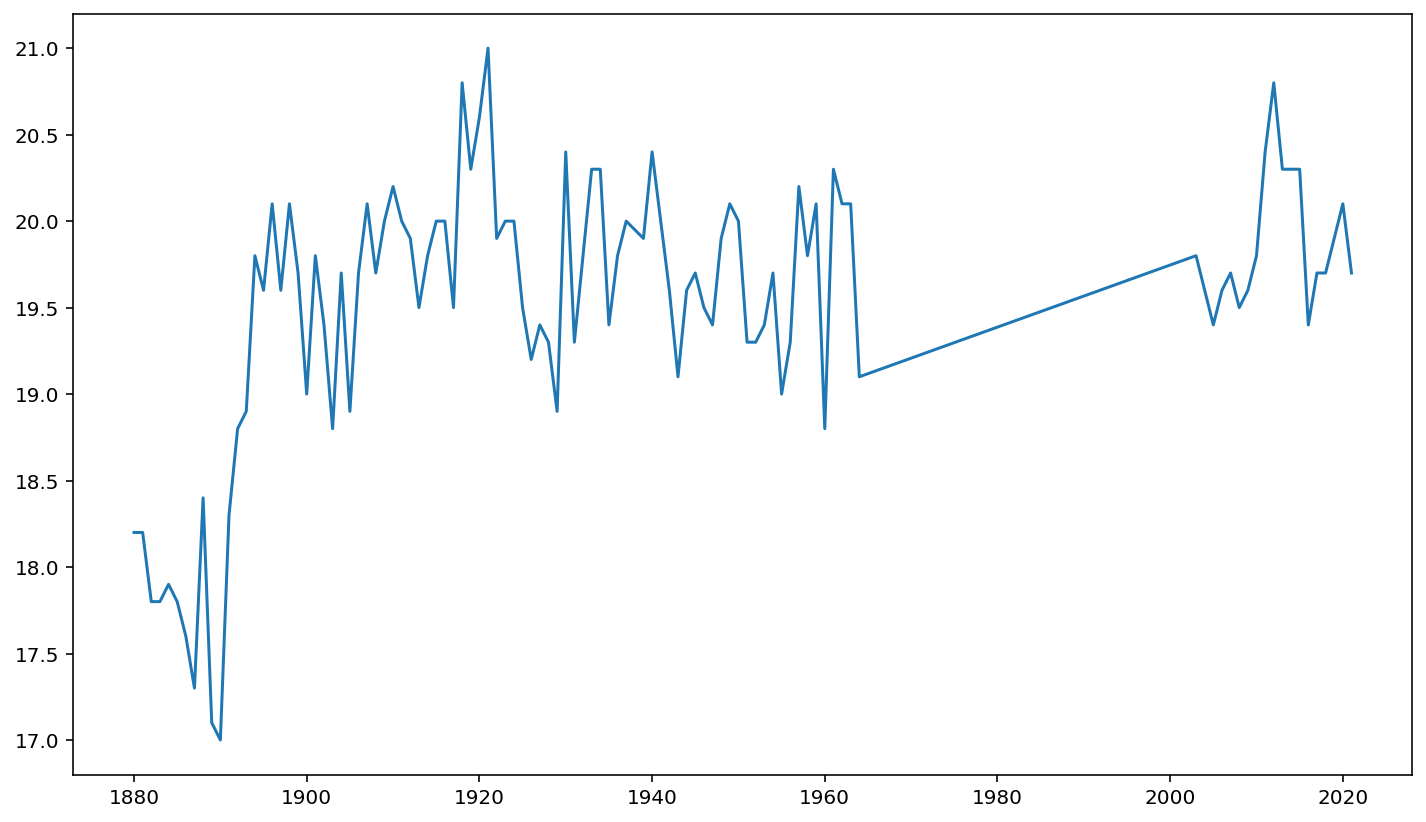

In [57]:
plt.plot(table_albany[:,0], table_albany[:,-1])
plt.show()

You will notice that the plot has not treated missing data well. Rather than a line joining the missing data, it would be more instructive to have a gap. (Our plot of the cleaned data will also not include the final year in the x-axis.)

One way to leave gaps is to ensure all missing years are set to `nan`. Matplotlib will not plot these years by default.

* To demonstrate this, plot the _uncleaned_ data for Albany.


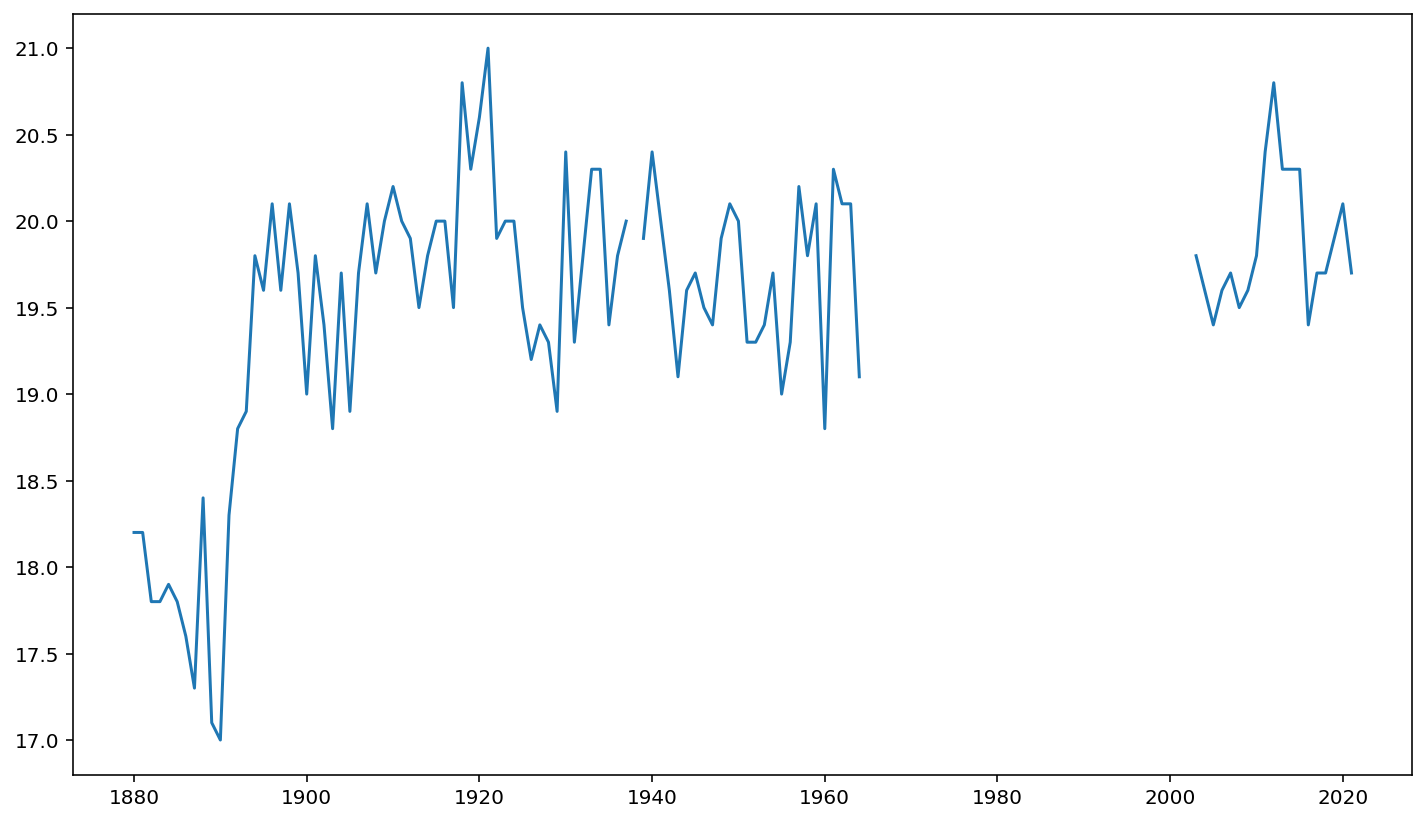

In [58]:
uncleaned = get_table('Albany')
plt.plot(uncleaned[:,0], uncleaned[:,-1])
plt.show()

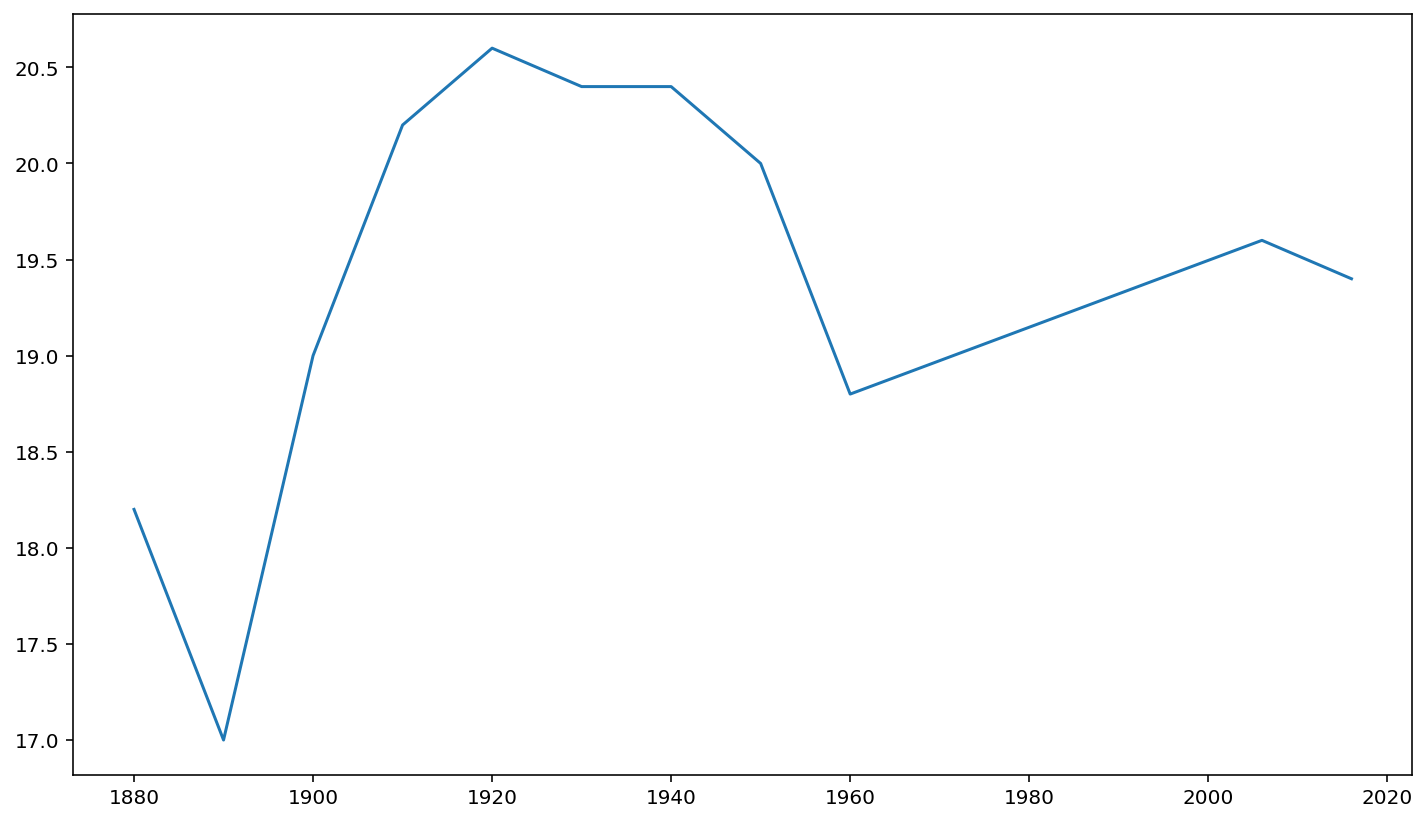

In [59]:
plt.plot(uncleaned[::10,0],uncleaned[::10,-1])
plt.show()

At first sight this appears to have solved our problem! We can just use the uncleaned data.

But actually this is just a coincidence of our specific data, not a general solution.

Have a look at the data file for Albany. It happens that the gap of missing data from 1966 to 2001 has a null value either side. This causes matplotlib to not put a line between those values.

To demonstrate this, we can leave some other gaps without null values. A quick way to do this is by plotting every tenth value.

```
table = get_table("Albany",STATIONS)
plt.plot(table[::10,0], table[::10,-1])
plt.show()
```

* Generate this plot. What do you see?


### Augmenting the data

Matplotlib 'does its best' to anticpate what we want to see, and does a pretty good job in general! After all, it filled in all the years on the x-axis for us (allowing us to be a bit lazy), even though we only fed it x values for some of the years.

But it can only do so much. We will need to do it properly.

We will now 'augment' the data by including all of the years ranging from the first to the last year in the data. We will set the missing years to `np.nan` so that they are not plotted.

We can do all of this in numpy without using any loops.


#### Q4 (Challenge). Identifying missing years [1 lab mark]

Write a method `missing_years(table)` that takes an uncleaned table, and returns an array of years (as integers) that fall within the range of years from the first in the table to the last in the table, that either:
* don't have a reported annual average in the table
* have a reported annual average of "null"

Your method should not use any loops (or search methods, like `isin`). You can use previously defined methods.

_Hint:_ It is suggested that you break it down into the following steps (about 9 lines of code):
* use the information from the uncleaned table to generate an array of all the years in the range of your table
* use the cleaned table to get an array of the years that have valid data
* determine the indices of the valid years in the full range of years
* generate a boolean mask over the full range of years that selects the non-valid years

_Tip:_ You may also find the method `np.astype()` useful for converting to integers.

Check your results are correct by comparing (visually) with the downloaded tables.

In [88]:
def missing_years (table):
    all_years = np.arange(table[0,0],table[-1,0]+1)
    all_years = all_years.astype(int)
    no_nan_years = np.array([ x[0] for x in table if ~np.isnan(x[-1])])
    no_nan_years = no_nan_years.astype(int)
    mask_index = no_nan_years - all_years[0]
    mask_boolean_array = np.ones(all_years.shape, dtype= bool)
    mask_boolean_array[mask_index] = False
    #missing_year = np.setdiff1d(all_years,no_nan_years) #another way comparing array
    result = all_years[mask_boolean_array]
    return result
   


In [89]:
from nose.tools import assert_equal
assert_equal(missing_years(get_table("Albany"))[2], 1966)
assert_equal(len(missing_years(get_table("Albany"))), 40)
assert_equal(len(missing_years(get_table("Perth"))), 2)
print("So far, so good.")


So far, so good.


In [62]:
uncleaned = get_table('Albany')
all_years = np.arange(uncleaned[0,0],uncleaned[-1,0])
all_years.astype(int)

array([1880, 1881, 1882, 1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890,
       1891, 1892, 1893, 1894, 1895, 1896, 1897, 1898, 1899, 1900, 1901,
       1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912,
       1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923,
       1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934,
       1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945,
       1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956,
       1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967,
       1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978,
       1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989,
       1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021])

In [63]:
uncleaned = get_table('Albany')
no_nan_years = np.array([ x[0] for x in uncleaned if ~np.isnan(x[-1])])
len(no_nan_years)

103

In [64]:
albany = clean_all(tables)[towns.index("Albany")]
albany
cleaned_years = np.array([ x[0] for x in albany  ])
cleaned_years.astype(int)


array([1880, 1881, 1882, 1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890,
       1891, 1892, 1893, 1894, 1895, 1896, 1897, 1898, 1899, 1900, 1901,
       1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912,
       1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923,
       1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934,
       1935, 1936, 1937, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946,
       1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957,
       1958, 1959, 1960, 1961, 1962, 1963, 1964, 2003, 2004, 2005, 2006,
       2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
       2018, 2019, 2020, 2021])

In [65]:
missing_year = np.setdiff1d(all_years,cleaned_years)
missing_year

array([1938., 1965., 1966., 1967., 1968., 1969., 1970., 1971., 1972.,
       1973., 1974., 1975., 1976., 1977., 1978., 1979., 1980., 1981.,
       1982., 1983., 1984., 1985., 1986., 1987., 1988., 1989., 1990.,
       1991., 1992., 1993., 1994., 1995., 1996., 1997., 1998., 1999.,
       2000., 2001., 2002.])

In [66]:
nan_array = np.full_like(missing_year, np.nan)
nan_array

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])

In [67]:
new_1 = np.hstack ((no_nan_years, missing_year))
new_1
no_nan_averages = np.array([ x[-1] for x in albany if ~np.isnan(x[-1])])
new_2 = np.hstack ((no_nan_averages, nan_array))
new_2

new_3 = np.stack((new_1,new_2)).T
new_3

new_4 =  new_3[new_3[:,0].argsort()]
new_5 = new_4.T
new_5[1][85]

nan

#### Q5. Augmenting with `nan` [1 lab mark]

* Write a function `augmented(table)` that returns a pair of arrays:
  * the first is an array of all the years in the range of years covered in the table, as integers
  * the second is an array of floats which contains:
    * the reported annual average for the corresponding year
    * `np.nan` where either the data was null or missing

Again the function should have no loops.

_Hint:_ Use a similar structure to `missing_years`.

Again, check you are getting the right results on the downloaded tables.


In [112]:
def augmented (table):
    missing_yrs = missing_years(table)
    nan_array = np.full_like(missing_yrs, np.nan, dtype = np.double)
    no_nan_years = np.array([ x[0] for x in table if ~np.isnan(x[-1])])
    no_nan_averages = np.array([ x[-1] for x in table if ~np.isnan(x[-1])])
    year_array = np.hstack ((no_nan_years, missing_yrs))
    average_array = np.hstack ((no_nan_averages, nan_array))
    unsorted_array = np.stack ((year_array,average_array))
    sorted_array = unsorted_array [ :, unsorted_array[0].argsort()]
    return sorted_array

In [92]:
assert_equal(augmented(get_table("Albany"))[1][84], 19.1)
assert_equal(np.isnan(augmented(get_table("Albany"))[1][85]), True)
assert_equal(np.isnan(augmented(get_table("Albany"))[1][86]), True)
print("So far, so good.")


So far, so good.


* Plot the augmented table for Albany. Is it whate you expected?

## Visualising the Complete Data!

At last its time to plot the historic temperatures. But because we've prepared well, if you've got this far this part is straightforward! It shouldn't take more than about 4 lines of code to get and plot the data for all the towns in `STATIONS` (plus a few lines to label the graph).

* Plot all the historical data for average annual temperatures for all towns on a single chart.

Part of the chart should look something like this (yours should include all four towns and all years):

<div>
    <img src="partial-graph.png" width=600>
</div>

Can you see any trends? How might you quantify this?


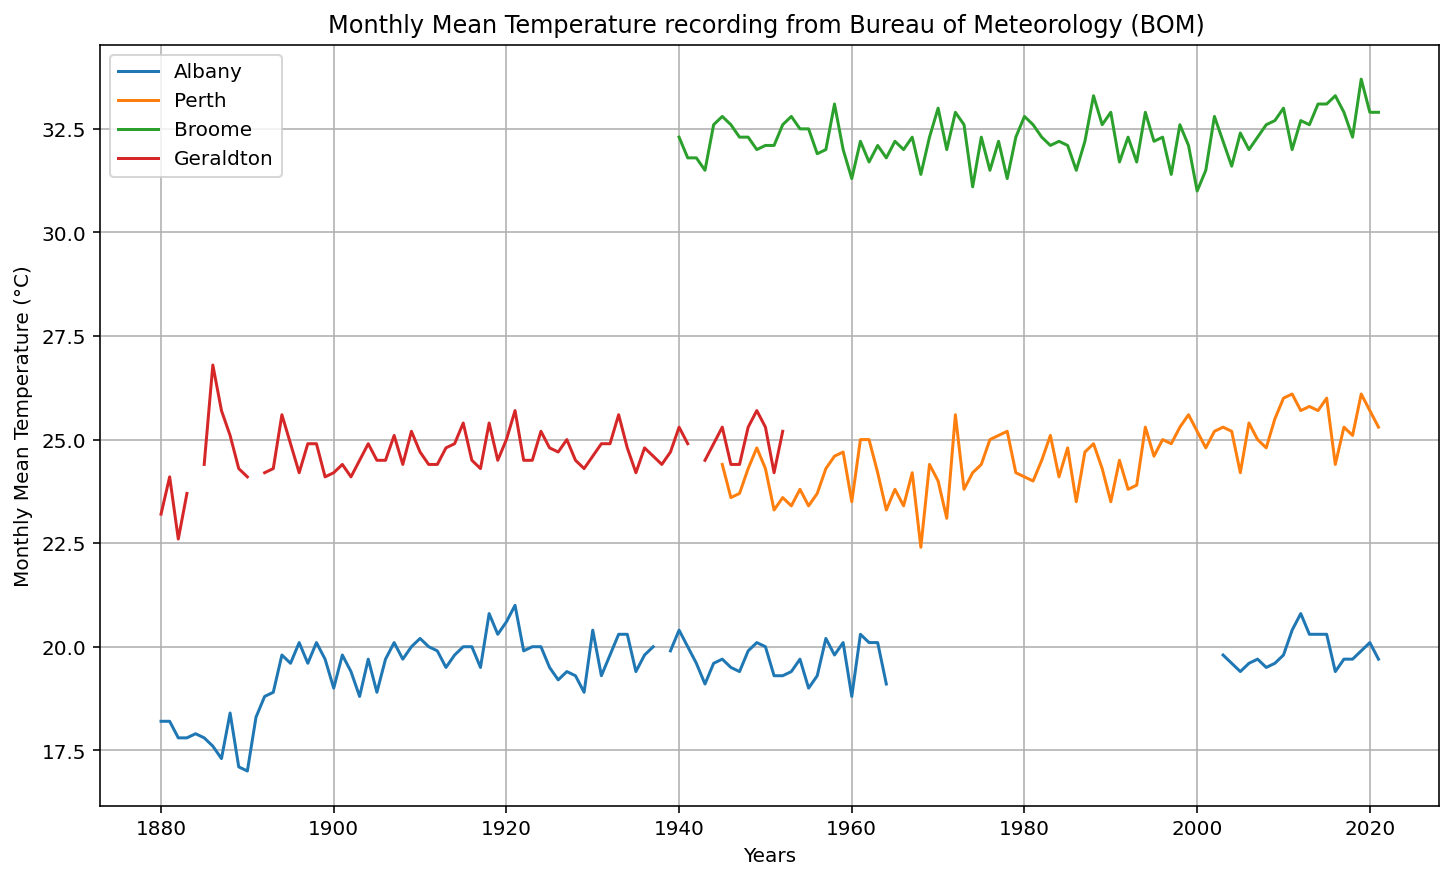

In [111]:
for station in STATIONS.keys():
    result = augmented(get_table(station))
    legend_label = station
    plt.plot(result[0],result[1],label=legend_label)
plt.legend()
plt.xlabel('Years')
plt.ylabel('Monthly Mean Temperature (°C)')
plt.title ("Monthly Mean Temperature recording from Bureau of Meteorology (BOM) ")
plt.grid()
plt.show()


&copy; Cara MacNish